# Simulated Phase Diagram 

### Step 1
Activate the Plastid conda environment and open up a Jupyter Lab session (alternatively, a python file can be run in this python environment)

### Step 2
Load in all of the necessary Python packages.

In [1]:
# Let the program know where to find your tools file.
import sys
sys.path.append('/home/keeganfl/Desktop/Work_Fall_2021/Fall_2021_Work_journal/tools/')

In [2]:
# Import necessary packages
from plastid import BAMGenomeArray, VariableFivePrimeMapFactory, \
                        GTF2_TranscriptAssembler, GFF3_TranscriptAssembler, \
                        Transcript, ThreePrimeMapFactory, CenterMapFactory
from plastid.plotting.plots import *
import numpy as np
import os
from Bio import SeqIO
import numpy
import math
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
import keegan_analysis_tools as kat
import TASEP_tools as tt
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import random
from matplotlib.pyplot import figure
from scipy.sparse.linalg import lsqr
from multiprocess import Pool
from tqdm import tqdm
from sympy import symbols, solve, sqrt

In [3]:
image_path = '/home/keeganfl/Desktop/Work_Fall_2021/Presentation_figures/'

### Step 3
The get_all_intermediates() function is identical to the simulate_profiles() function with the exception of the fact that it outputs all of the intermediate values. Create a list for each of the intermediate values outputted by get_all_intermediates() and then use a forloop to run the function multiple times while saving the outputs into our lists. This is going to require making a lot of lists!

In [4]:
# Create a large series of lists to hold all of the results and intermediate values from out mutant and control samples. 
data_control = []
data_mutant = []
J_control = []
J_mutant = []
phase_control = []
phase_mutant = []
alphas = []
mu_alphas = []
betas = []
mu_betas = []
crit_alphas = []
crit_betas = []
crit_mu_alphas = []
crit_mu_betas = []
min_lambs = []
mu_min_lambs = []
ini_lambs = []
mu_ini_lambs = []
term_lambs = []
mu_term_lambs = []

# Run a large number of simulations using the get_all_intermediates function so that you can save all of the intermediate values. 
for i in range(80):
    length = numpy.random.randint(200,2500)
    alpha = numpy.random.uniform(0.004,0.02)
    x = tt.get_all_intermediates(mean_lambda = 4, sd = 3, length = length, a= alpha, B = 2, read_density = 0.5, pause_N = 7, pause_str = 0.2, 
                         a_frac = 1, elon_frac = 1)
    data_control.append(x[0])
    J_control.append(x[1])
    phase_control.append(x[2])
    alphas.append(x[3])
    betas.append(x[4])
    crit_alphas.append(x[5])
    crit_betas.append(x[6])
    min_lambs.append(x[7])
    ini_lambs.append(x[8])
    term_lambs.append(x[9])
    data_mutant.append(x[10])
    J_mutant.append(x[11])
    phase_mutant.append(x[12])
    mu_alphas.append(x[13])
    mu_betas.append(x[14])
    crit_mu_alphas.append(x[15])
    crit_mu_betas.append(x[16])
    mu_min_lambs.append(x[17])
    mu_ini_lambs.append(x[18])
    mu_term_lambs.append(x[19])

### Step 4
Create our phase diagrams by creating scatter plots with $\alpha/\alpha^*$ from our simulated samples on the x-axis and $\beta/\beta^*$ on the y-axis. Create a horizontal line that goes from 1 to infinity on the x-axis, a vertical line that goes from 1 to infinity on the y-axis, and a diagonal line that goes from 0 to 1 on both axes. Our phase diagram is now complete. 

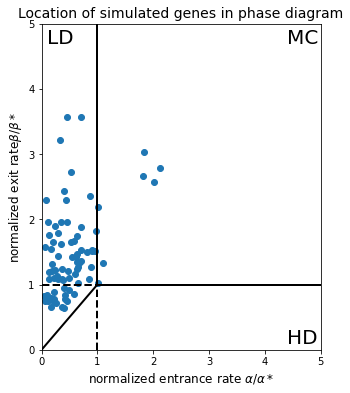

Text(3.4, 0.1, 'HD')

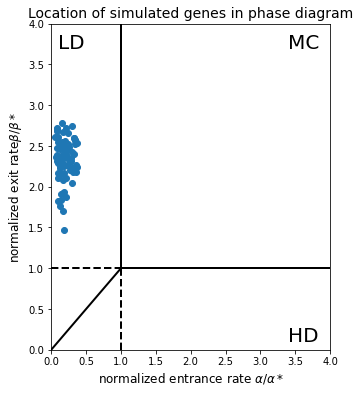

In [5]:
# Create a phase diagram for our mutant sample.
figure(figsize = (5,6))
plt.scatter((np.array(mu_alphas)/np.array(crit_mu_alphas)), (np.array(mu_betas)/np.array(crit_mu_betas))*0.02)
plt.ylim([0,5])
plt.xlim([0,5])
plt.xlabel('normalized entrance rate ' + r'$\alpha / \alpha*$', fontsize = 12)
plt.ylabel('normalized exit rate' + r'$\beta / \beta*$', fontsize = 12)
plt.title("Location of simulated genes in phase diagram", fontsize = 14)
plt.plot([1, 1], [1, 10], 'k-', lw=2)
plt.plot([1, 10], [1,1], 'k-', lw = 2)
plt.plot([0, 1], [0,1], 'k-', lw = 2)
plt.plot([0, 1], [1,1], 'k--', lw = 2)
plt.plot([1, 1], [0,1], 'k--', lw = 2)
plt.text(0.1,4.7, "LD", fontsize = 20)
plt.text(4.4,4.7, "MC", fontsize = 20)
plt.text(4.4,0.1, "HD", fontsize = 20)
plt.savefig(image_path + 'phase_diagram_example.pdf')
plt.show()

# Create a phase diagram for our control sample. 
figure(figsize = (5,6))
plt.scatter((np.array(alphas)/np.array(crit_alphas)), (np.array(betas)/np.array(crit_betas))*0.07)
plt.ylim([0,4])
plt.xlim([0,4])
plt.xlabel('normalized entrance rate ' + r'$\alpha / \alpha*$', fontsize = 12)
plt.ylabel('normalized exit rate' + r'$\beta / \beta*$', fontsize = 12)
plt.title("Location of simulated genes in phase diagram", fontsize = 14)
plt.plot([1, 1], [1, 10], 'k-', lw=2)
plt.plot([1, 10], [1,1], 'k-', lw = 2)
plt.plot([0, 1], [0,1], 'k-', lw = 2)
plt.plot([0, 1], [1,1], 'k--', lw = 2)
plt.plot([1, 1], [0,1], 'k--', lw = 2)
plt.text(0.1,3.7, "LD", fontsize = 20)
plt.text(3.4,3.7, "MC", fontsize = 20)
plt.text(3.4,0.1, "HD", fontsize = 20)

### Step 5
The get_crit_lambda() function can be used to determine can be used to determine the minimum elongation rate that would be necessary to cause a phase shift in one of our simulated samples. This allows us to calculate how far the sample is from being elongation limited (e.g. how many times slower would the minimum elongation rate need to be to induce elongation limitation.)

In [6]:
# determine the minimum elongation rate necessary for a phase change for one of our samples.
x = tt.get_crit_lambda(mu_alphas[1],mu_ini_lambs[1])

# determine the difference between the minimum elongation rate necessary for a phase change and the observed minimum elongation rate. 
mu_min_lambs[1]/x[0]

2.82663561706231